In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("elinachen717/municipal-solid-waste-dataset")
print("Path to dataset files:", path)

100%|██████████| 4.81M/4.81M [00:00<00:00, 54.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elinachen717/municipal-solid-waste-dataset/versions/1


In [ ]:
# Install TensorFlow if not already installed
!pip install tensorflow

# Import necessary libraries
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d elinachen717/municipal-solid-waste-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Municipal_waste.zip to Municipal_waste.zip


In [ ]:
!unzip -q '/content/Municipal_waste.zip' -d /content/Dataset

replace /content/Dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content/Dataset

Dataset


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_dir = '/content/Dataset/Dataset'
output_dir = '/content/output_dataset'

os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

classes = os.listdir(dataset_dir)
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    if not os.path.isdir(cls_path):
        continue  # skip files, keep only folders

    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    images = os.listdir(cls_path)
    train_and_val, test = train_test_split(images, test_size=0.2, random_state=42)
    train, val = train_test_split(train_and_val, test_size=0.2, random_state=42)

    for img in train:
        shutil.copy(os.path.join(cls_path, img), os.path.join(output_dir, 'train', cls, img))
    for img in val:
        shutil.copy(os.path.join(cls_path, img), os.path.join(output_dir, 'val', cls, img))
    for img in test:
        shutil.copy(os.path.join(cls_path, img), os.path.join(output_dir, 'test', cls, img))

print("✅ Dataset successfully split into train/val/test.")


✅ Dataset successfully split into train/val/test.


In [ ]:
dataset_dir='/content/output_dataset'
train_dir=os.path.join(dataset_dir,'train')
val_dir=os.path.join(dataset_dir,'val')
test_dir=os.path.join(dataset_dir,'test')
IMG_SIZE=(224,224)
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],  # Adding brightness range
    channel_shift_range=50.0    # Adding color jitter
)
val_test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)
val_generator=val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)
test_generator=val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 249 images belonging to 3 classes.
Found 63 images belonging to 3 classes.
Found 78 images belonging to 3 classes.
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}


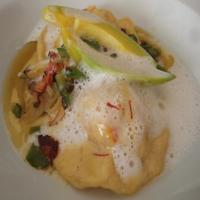

In [ ]:
import random
from IPython.display import Image, display
folder_path='/content/output_dataset/train/Biodegradable Images'
image_files=[f for f in os.listdir(folder_path) if f.endswith(('.png','.jpg','.jpeg'))]
selected_image=random.choice(image_files)
image_path=os.path.join(folder_path,selected_image)
display(Image(filename=image_path))

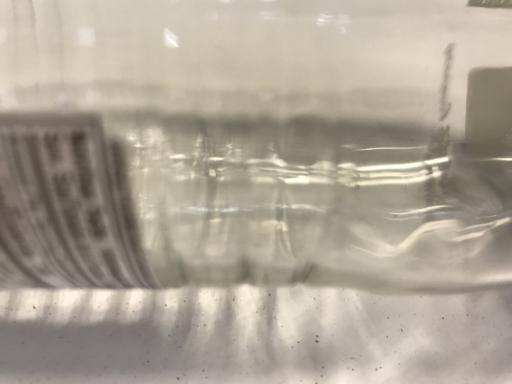

In [ ]:
folder_path = 'output_dataset/train/Recyclable Images'  # Changed to the directory containing the image
image_files = [
    f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))
]
selected_image = random.choice(image_files)
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

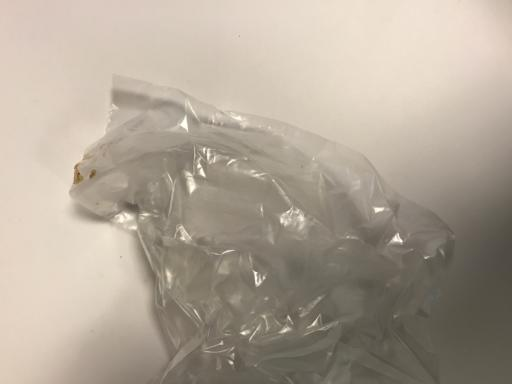

In [ ]:
folder_path='/content/output_dataset/train/Trash Images'
image_files=[f for f in os.listdir(folder_path) if f.endswith(('.png','.jpg','.jpeg'))]
selected_image=random.choice(image_files)
image_path=os.path.join(folder_path,selected_image)
display(Image(filename=image_path))

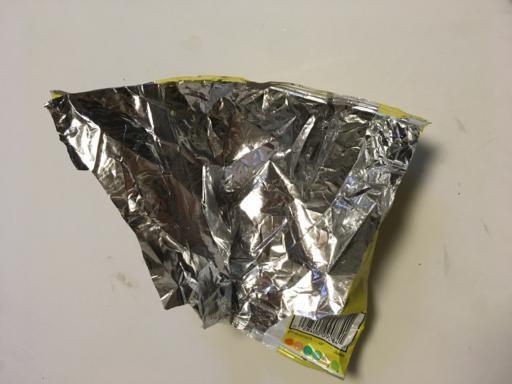

In [ ]:
folder_path='/content/output_dataset/val/Trash Images'
image_files=[f for f in os.listdir(folder_path) if f.endswith(('.png','.jpg','.jpeg'))]
selected_image=random.choice(image_files)
image_path=os.path.join(folder_path,selected_image)
display(Image(filename=image_path))

In [ ]:
!pip install Augmentor

In [ ]:
train_path="/content/output_dataset/train"
test_path="/content/output_dataset/test"

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=20)
test=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=20)

Found 249 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [ ]:
vgg=VGG16(include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
output=Dense(3,activation='softmax')(x)

In [ ]:
vgg16=Model(vgg.input,output)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [ ]:
# Import necessary libraries
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Assuming train_generator and val_generator are your data generators
# Extract data and labels from the generators
X_train, y_train = next(train_generator)
X_val, y_val = next(val_generator)

# Compute class weights based on the class distribution
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert the class weights to a dictionary format
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

# Unfreeze some layers for fine-tuning
for layer in vgg16.layers[:15]:
    layer.trainable = False
# Ensure the model is compiled before training
vgg16.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model using the extracted data
history = vgg16.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)

Class weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.2812 - loss: 1.2703 - val_accuracy: 0.4688 - val_loss: 1.0750
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.2812 - loss: 1.2465 - val_accuracy: 0.4688 - val_loss: 1.0646
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - accuracy: 0.2812 - loss: 1.2235 - val_accuracy: 0.4688 - val_loss: 1.0550
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.2812 - loss: 1.2014 - val_accuracy: 0.4688 - val_loss: 1.0463
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.2812 - loss: 1.1802 - val_accuracy: 0.5000 - val_loss: 1.0385
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step - accuracy: 0.2812 - loss: 1.1597 - val_accuracy: 0.5000 - val_loss: 1.0314
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - accuracy: 0.2812 - loss: 1.1401 - val_accuracy: 0.5000 - val_loss: 1.0251
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626m

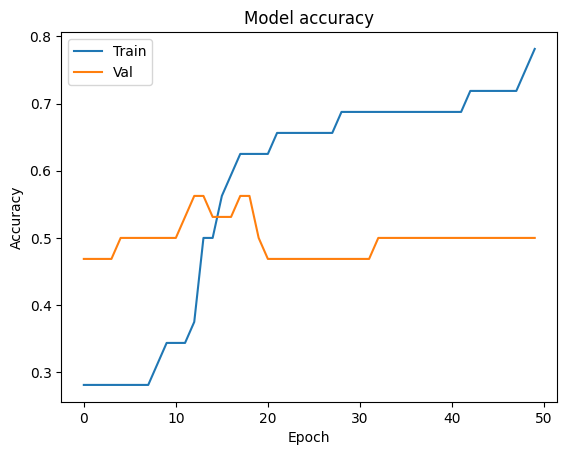

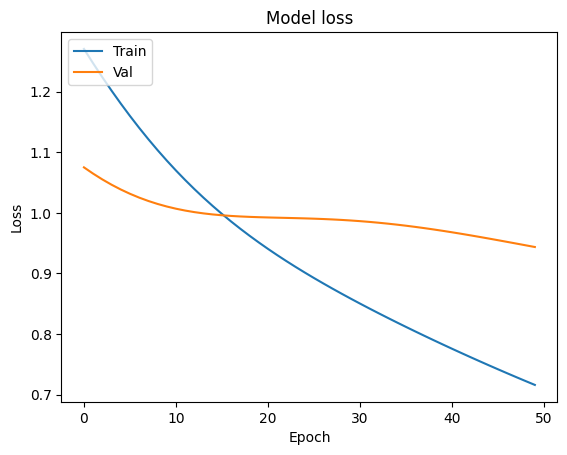

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = vgg16.evaluate(test_generator)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5025 - loss: 0.9296
Test loss: 0.9266893267631531, Test accuracy: 0.5128205418586731


In [ ]:
!ls '/content/output_dataset/val/Trash Images'


TRAIN.2_NBIODEG_CCW_1007.jpg  trash108.jpeg  trash15.jpeg  trash87.jpeg
TRAIN.2_NBIODEG_CCW_100.jpg   trash112.jpeg  trash23.jpeg  trash92.jpeg
TRAIN.4_NBIODEG_CCW_1503.jpg  trash120.jpeg  trash3.jpeg   trash98.jpeg
TRAIN.4_NBIODEG_CCW_2209.jpg  trash128.jpeg  trash66.jpeg
TRAIN.4_NBIODEG_CCW_2210.jpg  trash129.jpeg  trash75.jpeg
TRAIN.4_NBIODEG_CCW_2372.jpg  trash134.jpeg  trash78.jpeg


In [ ]:
# After training, make predictions on a sample image
img_path = 'output_dataset/val/Trash Images/trash23.jpeg'
img = load_img(img_path, target_size=(224, 224))

# Convert image to array
x = img_to_array(img)

# Preprocess image as required by VGG16
x = preprocess_input(x)

# Predict with VGG16
preds = vgg16.predict(np.array([x]))

# Get the predicted class index (highest probability)
predicted_class_index = np.argmax(preds, axis=1)

# Decode the predicted class
class_labels = list(train_generator.class_indices.keys())  # Get the class labels from the train generator
predicted_class_label = class_labels[predicted_class_index[0]]  # Get class label by index

print(f"Predicted class: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Recyclable Images


In [ ]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,940,491 (56.99 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 150,536 (588.04 KB)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import img_to_array # load_image is removed
from keras.utils import load_img as load_image  # Import load_img from keras.utils
labels=[0,1,2]

In [ ]:
!ls '/content/output_dataset/train/Recyclable Images'


cardboard107.jpeg  glass151.jpeg  metal157.jpeg  paper198.jpeg
cardboard108.jpeg  glass152.jpeg  metal171.jpeg  plastic103.jpeg
cardboard115.jpeg  glass153.jpeg  metal185.jpeg  plastic105.jpeg
cardboard127.jpeg  glass163.jpeg  metal190.jpeg  plastic116.jpeg
cardboard130.jpeg  glass16.jpeg   metal198.jpeg  plastic127.jpeg
cardboard131.jpeg  glass180.jpeg  paper100.jpeg  plastic130.jpeg
cardboard134.jpeg  glass18.jpeg   paper110.jpeg  plastic135.jpeg
cardboard136.jpeg  glass193.jpeg  paper115.jpeg  plastic14.jpeg
cardboard138.jpeg  glass194.jpeg  paper119.jpeg  plastic151.jpeg
cardboard146.jpeg  glass19.jpeg   paper11.jpeg	 plastic152.jpeg
cardboard151.jpeg  glass202.jpeg  paper123.jpeg  plastic157.jpeg
cardboard153.jpeg  metal102.jpeg  paper126.jpeg  plastic15.jpeg
cardboard160.jpeg  metal110.jpeg  paper136.jpeg  plastic160.jpeg
cardboard165.jpeg  metal114.jpeg  paper137.jpeg  plastic165.jpeg
glass101.jpeg	   metal118.jpeg  paper145.jpeg  plastic167.jpeg
glass104.jpeg	   metal120.jpeg  

In [ ]:
img_path='/content/output_dataset/train/Recyclable Images/metal125.jpeg'

import numpy as np
img=load_img(img_path,target_size=(224,224))
x=img_to_array(img)
x=preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[3.1448670e-03, 4.1917376e-09, 9.9685514e-01]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

2

In [ ]:
import os

def find_image_paths(root_dir):
    """
    Finds all image paths within a directory and its subdirectories.

    Args:
        root_dir (str): The path to the root directory.

    Returns:
        list: A list of image paths.
    """
    image_paths = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Adjust extensions as needed
                image_paths.append(os.path.join(dirpath, filename))
    return image_paths

# Example usage:
root_directory = '/content/output_dataset/train'  # Replace with your desired directory
image_paths = find_image_paths(root_directory)

# Print the image paths
for path in image_paths:
    print(path)

/content/output_dataset/train/Recyclable Images/glass153.jpeg
/content/output_dataset/train/Recyclable Images/paper145.jpeg
/content/output_dataset/train/Recyclable Images/glass104.jpeg
/content/output_dataset/train/Recyclable Images/glass110.jpeg
/content/output_dataset/train/Recyclable Images/paper165.jpeg
/content/output_dataset/train/Recyclable Images/cardboard165.jpeg
/content/output_dataset/train/Recyclable Images/glass16.jpeg
/content/output_dataset/train/Recyclable Images/cardboard138.jpeg
/content/output_dataset/train/Recyclable Images/cardboard108.jpeg
/content/output_dataset/train/Recyclable Images/plastic157.jpeg
/content/output_dataset/train/Recyclable Images/glass101.jpeg
/content/output_dataset/train/Recyclable Images/metal125.jpeg
/content/output_dataset/train/Recyclable Images/plastic116.jpeg
/content/output_dataset/train/Recyclable Images/cardboard115.jpeg
/content/output_dataset/train/Recyclable Images/paper115.jpeg
/content/output_dataset/train/Recyclable Images/met

In [ ]:
!ls '/content/output_dataset/train/Biodegradable Images'

 TEST_BIODEG_HFL_0.jpeg         TRAIN.2_BIODEG_ORI_1083.jpg
 TEST_BIODEG_HFL_1000.jpeg      TRAIN.2_BIODEG_ORI_10942.jpg
 TEST_BIODEG_HFL_1004.jpeg      TRAIN.2_BIODEG_ORI_10946.jpg
 TEST_BIODEG_HFL_1005.jpeg      TRAIN.2_BIODEG_ORI_11042.jpg
 TEST_BIODEG_HFL_1009.jpeg      TRAIN.2_BIODEG_ORI_1110.jpg
 TEST_BIODEG_HFL_1.jpeg         TRAIN.2_BIODEG_ORI_11171.jpg
 TRAIN.1_BIODEG_ORI_10035.jpg   TRAIN.2_BIODEG_ORI_11172.jpg
 TRAIN.2_BIODEG_ORI_10047.jpg   TRAIN.2_BIODEG_ORI_11175.jpg
 TRAIN.2_BIODEG_ORI_10048.jpg   TRAIN.2_BIODEG_ORI_11176.jpg
 TRAIN.2_BIODEG_ORI_1010.jpg    TRAIN.2_BIODEG_ORI_11180.jpg
 TRAIN.2_BIODEG_ORI_10125.jpg   TRAIN.2_BIODEG_ORI_11197.jpg
 TRAIN.2_BIODEG_ORI_10139.jpg   TRAIN.2_BIODEG_ORI_11224.jpg
 TRAIN.2_BIODEG_ORI_10143.jpg   TRAIN.2_BIODEG_ORI_11242.jpg
 TRAIN.2_BIODEG_ORI_1014.jpg    TRAIN.2_BIODEG_ORI_11252.jpg
 TRAIN.2_BIODEG_ORI_10151.jpg   TRAIN.2_BIODEG_ORI_11260.jpg
 TRAIN.2_BIODEG_ORI_10154.jpg   TRAIN.2_BIODEG_ORI_11275.jpg
 TRAIN.2_BIODEG_ORI_10155.

In [ ]:
img_path='/content/output_dataset/train/Biodegradable Images/TRAIN.2_BIODEG_ORI_10788.jpg'
import numpy as np
img=load_img(img_path,target_size=(224,224))
x=img_to_array(img)
x=preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[9.9911100e-01, 2.5682214e-08, 8.8896207e-04]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

0

In [ ]:
img_path='/content/output_dataset/train/Trash Images/trash124.jpeg'
import numpy as np
img=load_img(img_path,target_size=(224,224))
x=img_to_array(img)
x=preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.7448808 , 0.00515733, 0.24996182]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

0

In [ ]:
img_path='/content/output_dataset/train/Biodegradable Images/TEST_BIODEG_HFL_1009.jpeg'
import numpy as np
img=load_img(img_path,target_size=(224,224))
x=img_to_array(img)
x=preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[9.0067497e-06, 1.1573916e-03, 9.9883360e-01]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

2

In [ ]:
!ls '/content/output_dataset/train/Recyclable Images'

cardboard107.jpeg  glass151.jpeg  metal157.jpeg  paper198.jpeg
cardboard108.jpeg  glass152.jpeg  metal171.jpeg  plastic103.jpeg
cardboard115.jpeg  glass153.jpeg  metal185.jpeg  plastic105.jpeg
cardboard127.jpeg  glass163.jpeg  metal190.jpeg  plastic116.jpeg
cardboard130.jpeg  glass16.jpeg   metal198.jpeg  plastic127.jpeg
cardboard131.jpeg  glass180.jpeg  paper100.jpeg  plastic130.jpeg
cardboard134.jpeg  glass18.jpeg   paper110.jpeg  plastic135.jpeg
cardboard136.jpeg  glass193.jpeg  paper115.jpeg  plastic14.jpeg
cardboard138.jpeg  glass194.jpeg  paper119.jpeg  plastic151.jpeg
cardboard146.jpeg  glass19.jpeg   paper11.jpeg	 plastic152.jpeg
cardboard151.jpeg  glass202.jpeg  paper123.jpeg  plastic157.jpeg
cardboard153.jpeg  metal102.jpeg  paper126.jpeg  plastic15.jpeg
cardboard160.jpeg  metal110.jpeg  paper136.jpeg  plastic160.jpeg
cardboard165.jpeg  metal114.jpeg  paper137.jpeg  plastic165.jpeg
glass101.jpeg	   metal118.jpeg  paper145.jpeg  plastic167.jpeg
glass104.jpeg	   metal120.jpeg  

In [ ]:
img_path='/content/output_dataset/train/Recyclable Images/cardboard165.jpeg'
import numpy as np
img=load_img(img_path,target_size=(224,224))
x=img_to_array(img)
x=preprocess_input(x)
preds=vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[1.1435520e-05, 4.2509466e-02, 9.5747906e-01]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

2

In [ ]:
vgg16.save('vgg16.h5')

In [ ]:
from google.colab import files

# Replace 'model_file_name' with your file's name
files.download('vgg16.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>